In [105]:
import numpy as np
import matplotlib.pyplot as plt

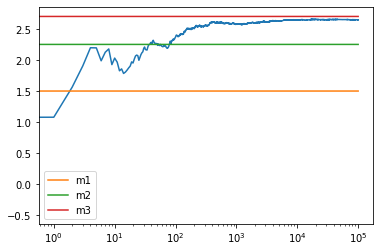

1.4687900521289305
2.2501382778337016
2.701531936148951


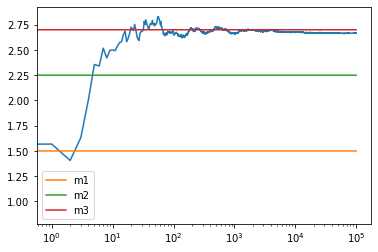

1.482592043930486
2.2852988471862905
2.6952005305557756


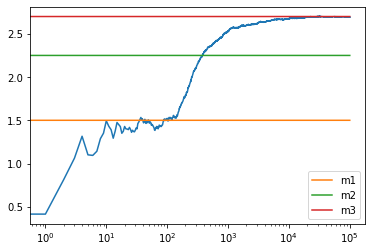

1.4786204173986839
2.1943460251140974
2.700334152391832


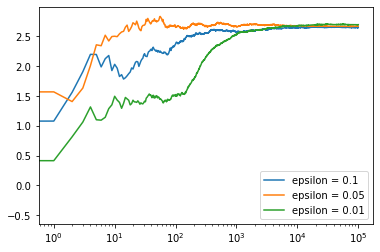

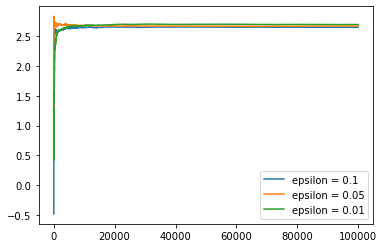

In [106]:
#Mendefinisikan kelas bandit
class Jackpot():
    def __init__(self, m):
        self.m = m #nilai reward mesin bandit yang sesungguhnya(kita yang buat)
        self.mean = 0 #nilai estimasi reward dimana agen belajar mengestimasinya dari setiap pengalaman / permainan
        self.N = 0 #state agen / pada iterasi keberapa saat ini
        
    def play(self):
        return np.random.randn() + self.m
    
    def update(self, x):
        self.N += 1
        self.mean = (1 - 1.0/self.N)*self.mean + 1.0/self.N*x
        
def runExperiment(m1, m2, m3, eps, N):
    mesinBandit = [Jackpot(m1), Jackpot(m2), Jackpot(m3)] #mendefinisikan 3 mesin jackpot dengan reward masing masing m1, m2, m3
    data = np.empty(N)
    
    for i in range(N):
        #Epsilon greedy ==> peluang eksplorasi. umumnya 0.05 - 0.1. semakin besar, maka agen semakin sering bereksplorasi
        p = np.random.random() #output antara 0.0 - 1.0
        if p < eps:
            j = np.random.choice(3) #Eksplorasi ==> memilih dan memainkan mesin secara random
        else:
            j = np.argmax([b.mean for b in mesinBandit]) #Eksploitasi ==> menghitung, memlilih, dan memainkan mesin mana yang estimasi rewardnya tertinggi
        x = mesinBandit[j].play()
        mesinBandit[j].update(x)
        
        #Untuk visualisasi nantinya
        data[i] = x
        
    cumulativeAvg = np.cumsum(data) / (np.arange(N) + 1)
    
    #Visualisasi masing masing mesin dengan skala logaritmik
    plt.plot(cumulativeAvg)
    plt.plot(np.ones(N)*m1, label="m1")
    plt.plot(np.ones(N)*m2, label="m2")
    plt.plot(np.ones(N)*m3, label="m3")
    plt.xscale("log")
    plt.legend()
    plt.show()
    
    for b in mesinBandit:
        print(b.mean) #menampilkan estimasi reward yang dipelajari oleh maisng2 mesin
        
    return cumulativeAvg

if __name__ == "__main__":
    c1 = runExperiment(1.5, 2.25, 2.7, 0.1, 100000)
    c05 = runExperiment(1.5, 2.25, 2.7, 0.05, 100000)
    c01 = runExperiment(1.5, 2.25, 2.7, 0.01, 100000)
    
    #Visualisasi berapa lama agen bisa converge dengan skala logaritmik pada semua mesin
    plt.plot(c1, label="epsilon = 0.1")
    plt.plot(c05, label="epsilon = 0.05")
    plt.plot(c01, label="epsilon = 0.01")
    plt.legend(loc="lower right")
    plt.xscale("log")
    plt.show()
    
#Visualisasi berapa lama agen bisa converge(mendapat solusi terbaik) dengan skala normal pada semua mesin
plt.plot(c1, label="epsilon = 0.1")
plt.plot(c05, label="epsilon = 0.05")
plt.plot(c01, label="epsilon = 0.01")
plt.legend()
plt.show()

In [108]:
for i in range(1, 100):
    print(np.random.randn())

0.7686199417277235
-0.29906661158438913
-0.754481561701013
-0.9783731580102941
0.7870362976046698
0.938531459787342
0.6942098547716393
-0.4682468602444891
0.15752713218881884
0.5294133124423801
1.5333281700526982
-0.42278232729951387
-0.520758188863133
-0.8671940812063628
0.808413966889437
-0.2228261414908505
0.6832519984204508
0.1352467320725058
0.12459618572268324
0.30949799956210733
-0.1945392616505204
0.10934480722952511
-0.20626050879345656
-0.5168628413802616
1.2905940435603227
-0.4156069582283672
-0.494924238931348
-2.834243209831004
-1.4542016234311872
0.5649134420130162
0.5945955173056814
1.6151963911203284
1.133661256143997
-0.6471095058916035
0.10408073544878431
-1.2374659887147381
1.173736823816449
-0.13951803827187698
-0.9141813625466648
1.0258146185396861
0.3671223574319309
-1.6869693290169605
0.12472200487611453
0.5299197026695653
0.5899434604508101
0.7602572647620316
-0.7410946002949944
0.26202013530984897
-0.6737910270588909
-0.31308761988064515
0.9801728264194794
-1.1